In [1]:
%matplotlib inline

import pandas as pd
import numpy as np


from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn import tree

In [2]:
data = pd.read_csv("abalone.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
def score(y_actual, y_preds):
    return sqrt(metrics.mean_squared_error(y_actual, y_preds))

In [8]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [9]:
y = data['Rings']
X = data.drop('Rings', axis=1)


In [10]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [11]:
data['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [12]:
import matplotlib.pyplot as plt
names=data.columns
names

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

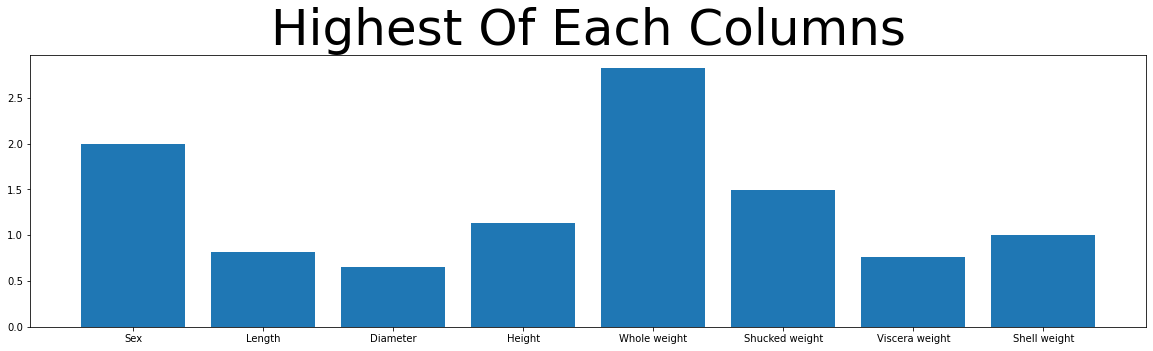

In [71]:
plt.figure(figsize=(20,5))
plt.bar(X.columns,X.iloc[:,:].max())
plt.title("Highest Of Each Columns",size=50)
plt.show()

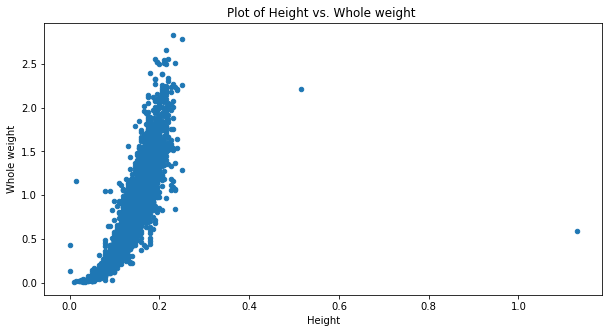

In [13]:
data.plot.scatter("Height", "Whole weight", figsize=(10, 5),
                title="Plot of Height vs. Whole weight ")
plt.show()


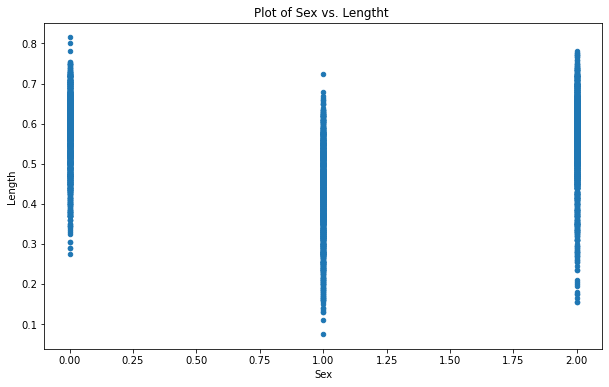

In [14]:
data.plot.scatter("Sex", "Length", figsize=(10, 6),
                title="Plot of Sex vs. Lengtht ")
plt.show()

In [15]:
#spliting the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True)

# DecisionTreeRegressor


In [16]:
model1 = DecisionTreeRegressor()


In [17]:
#training the DECISIONTREE MODEL
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
score(y_train, model1.predict(X_train)) 

0.0

In [19]:
score(y_valid, model1.predict(X_valid))

3.0031880986679576

# RandomForestRegressor

In [20]:
model3 = RandomForestRegressor(n_estimators=100, max_features=0.7, bootstrap=True, max_depth=10, min_samples_leaf=2, random_state=42)

In [21]:
#training the RANDOM FOREST MODEL
model3.fit(X_train,y_train)


RandomForestRegressor(max_depth=10, max_features=0.7, min_samples_leaf=2,
                      random_state=42)

In [22]:
score(y_train, model3.predict(X_train))

1.3848363496788334

In [23]:
score(y_valid, model3.predict(X_valid))

2.1913999208516692

In [24]:
print('Decision Tree Regressor R2 Score on Validation set :',metrics.r2_score(y_valid, model1.predict(X_valid)))
print('Random Forest Regressor R2 Score on Validation set :',metrics.r2_score(y_valid, model1.predict(X_valid)))

Decision Tree Regressor R2 Score on Validation set : 0.15532994609449524
Random Forest Regressor R2 Score on Validation set : 0.15532994609449524


In [35]:
preds = np.stack([t.predict(X_valid) for t in model3.estimators_])

C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor 

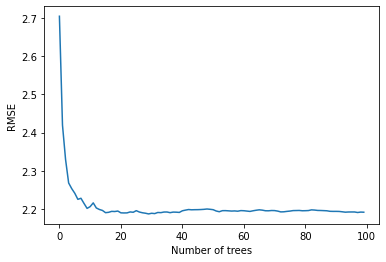

In [36]:
from matplotlib import pyplot as plt
plt.plot([sqrt(metrics.mean_squared_error(y_valid, np.mean(preds[:i+1], axis=0))) for i in range(100)])
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.show()

In [25]:
import pickle
filename='savedmodel.sav'
pickle.dump(model1, open('savedmodel.sav', 'wb'))

In [26]:
X.head()
load_model = pickle.load(open(filename, 'rb'))
load_model.predict([[2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150]])



C:\Users\Nithin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([15.])